In [5]:
import h5py
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

mpl.style.use('default')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.titlesize'] = 20
mpl.rcParams['figure.figsize'] = [6.4*1.2,4.8*1.2]
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['lines.marker'] = 's'
mpl.rcParams['lines.linestyle'] = ''
mpl.rcParams['lines.markersize'] = 12
mpl.rcParams['errorbar.capsize'] = 12
mpl.rcParams['xtick.labelsize'] = mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['xtick.major.size'] = mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.top']=mpl.rcParams['ytick.right']=True
mpl.rcParams['xtick.direction']=mpl.rcParams['ytick.direction']='in'
mpl.rcParams['legend.fontsize'] = 24
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# h5ls -r
path='dat/NST_b_cD96.h5'
with h5py.File(path) as f:
    print(f.keys())
    print(f['cfgs'])
    print(f['diags'].keys())
    print(f['diags/N'].keys())
    print(f['diags/N/data'].keys())
    print(f['diags/N/data/N2_N2'])
    print(f['diags/N/opabs'])

    print()
    print(f['diags/N/opabs'])
    print(f['diags/N/opabs'][:]) 
    
    print()
    dat=(f['diags/N/data/N2_N2'][:,:,0]+f['diags/N/data/N2_N2'][:,:,1])/2
    dat=np.real(dat)
    
print(dat.shape)
Ncfg,Nt=dat.shape

<KeysViewHDF5 ['VEV', 'cfgs', 'diags']>
<HDF5 dataset "cfgs": shape (494,), type "|O">
<KeysViewHDF5 ['N', 'N-j', 'NJN', 'N_correlated_NJN']>
<KeysViewHDF5 ['data', 'opabs']>
<KeysViewHDF5 ['N2_N2']>
<HDF5 dataset "N2_N2": shape (494, 48, 4), type "<c8">
<HDF5 dataset "opabs": shape (4,), type "|O">

<HDF5 dataset "opabs": shape (4,), type "|O">
[b'g;0,0,0;G1g;a;l1;N_g;0,0,0;G1g;a;l1;N'
 b'g;0,0,0;G1g;a;l2;N_g;0,0,0;G1g;a;l2;N'
 b'g;0,0,1;G1;a;l1;N_g;0,0,1;G1;a;l1;N'
 b'g;0,0,1;G1;a;l2;N_g;0,0,1;G1;a;l2;N']

(494, 48)


(48,)
[1 2 3 4 0]


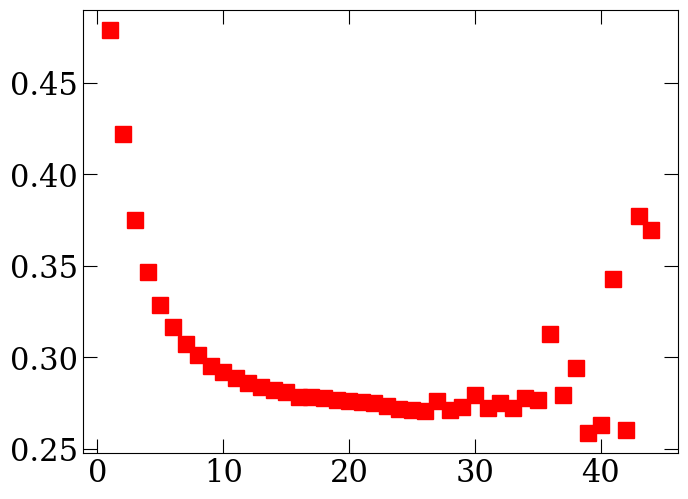

In [6]:
tList=range(Nt)
mean=np.mean(dat,axis=0)
print(mean.shape)
plt.plot(tList,mean,'rs')
plt.yscale('log')
plt.close()

print(np.roll([0,1,2,3,4],-1))

mEff=np.log(mean/np.roll(mean,-1))
plt.plot(tList,mEff,'rs')
plt.close()

tmin=1; tmax=44+1
plt.plot(tList[tmin:tmax],mEff[tmin:tmax],'rs')

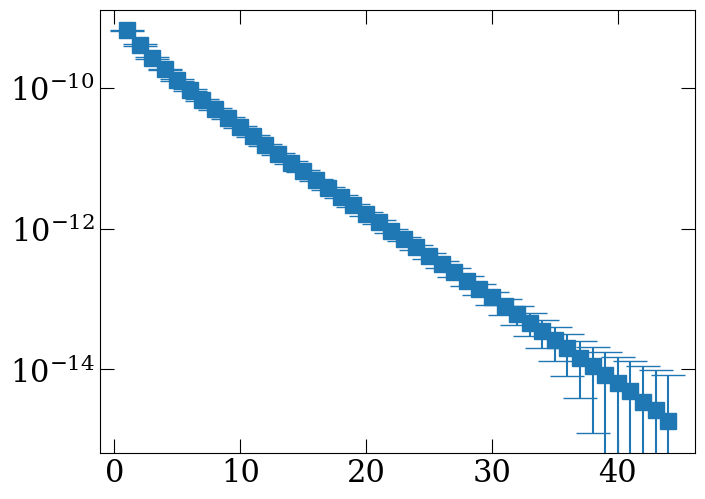

In [7]:
tList=range(Nt)
mean=np.mean(dat,axis=0)
err=np.sqrt(np.var(dat,axis=0,ddof=1))#/np.sqrt(Ncfg)
tmin=1; tmax=44+1
plt.errorbar(tList[tmin:tmax],mean[tmin:tmax],err[tmin:tmax],fmt='s')
plt.yscale('log')

In [8]:
# jackknife resampling (wikipedia)

mean=np.mean(dat,axis=0)
err=np.sqrt(np.var(dat,axis=0,ddof=1))/np.sqrt(Ncfg)
print(mean[:4])
print(err[:4])
print()

def jackknife(dat):
    return np.array([np.mean(np.delete(dat,i,axis=0),axis=0) for i in range(len(dat))])
def jackmean(dat_jk):
    return np.mean(dat_jk,axis=0)
def jackerr(dat_jk):
    n=len(dat_jk)
    return np.sqrt(np.var(dat_jk,axis=0)*(n-1))
def jackME(dat_jk):
    return(jackmean(dat_jk),jackerr(dat_jk))
def jackcov(dat_jk):
    n=len(dat_jk)
    return np.atleast_2d(np.cov(dat_jk.T)*(n-1)*(n-1)/n)

dat_jk=jackknife(dat)
mean=jackmean(dat_jk)
print(mean[:4])
err=jackerr(dat_jk)
print(err[:4])
cov=jackcov(dat_jk)
print(np.sqrt(np.diag(cov))[:4])

[2.9876571e-10 6.5290545e-10 4.0447462e-10 2.6524183e-10]
[4.2586822e-13 5.6919270e-13 3.7861817e-13 2.6227062e-13]

[2.9876573e-10 6.5290529e-10 4.0447434e-10 2.6524180e-10]
[4.2581986e-13 5.6922338e-13 3.7864674e-13 2.6229808e-13]
[4.25819030e-13 5.69209707e-13 3.78601796e-13 2.62295684e-13]


<ErrorbarContainer object of 3 artists>

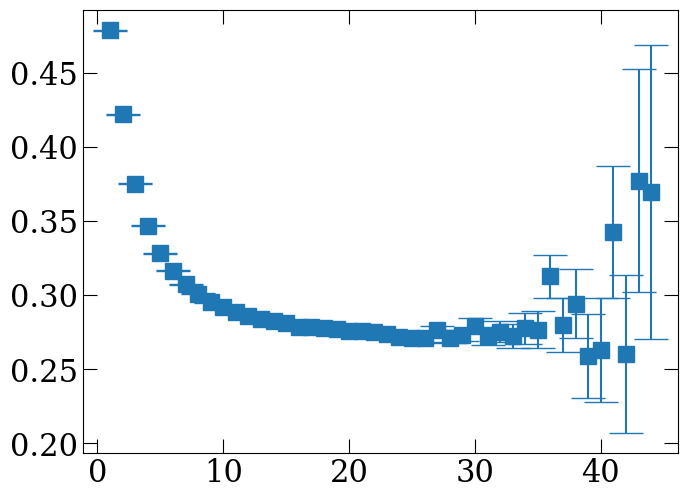

In [9]:
dat_jk=jackknife(dat)
tfunc=lambda C2pt: np.log(C2pt/np.roll(C2pt,-1,axis=0))
mEff_jk=np.array([tfunc(C2pt) for C2pt in dat_jk])

tList=range(Nt)
mEff_mean=jackmean(mEff_jk); mEff_err=jackerr(mEff_jk) 
tmin=1; tmax=44+1
tList_plt=np.arange(tmin,tmax); mean_plt=mEff_mean[tmin:tmax]; err_plt=mEff_err[tmin:tmax]
plt.errorbar(tList_plt,mean_plt,err_plt,fmt='s')

[(42, 0.20472229), (44, 0.26821133), (45, 0.6258017), (46, 0.3935483)]


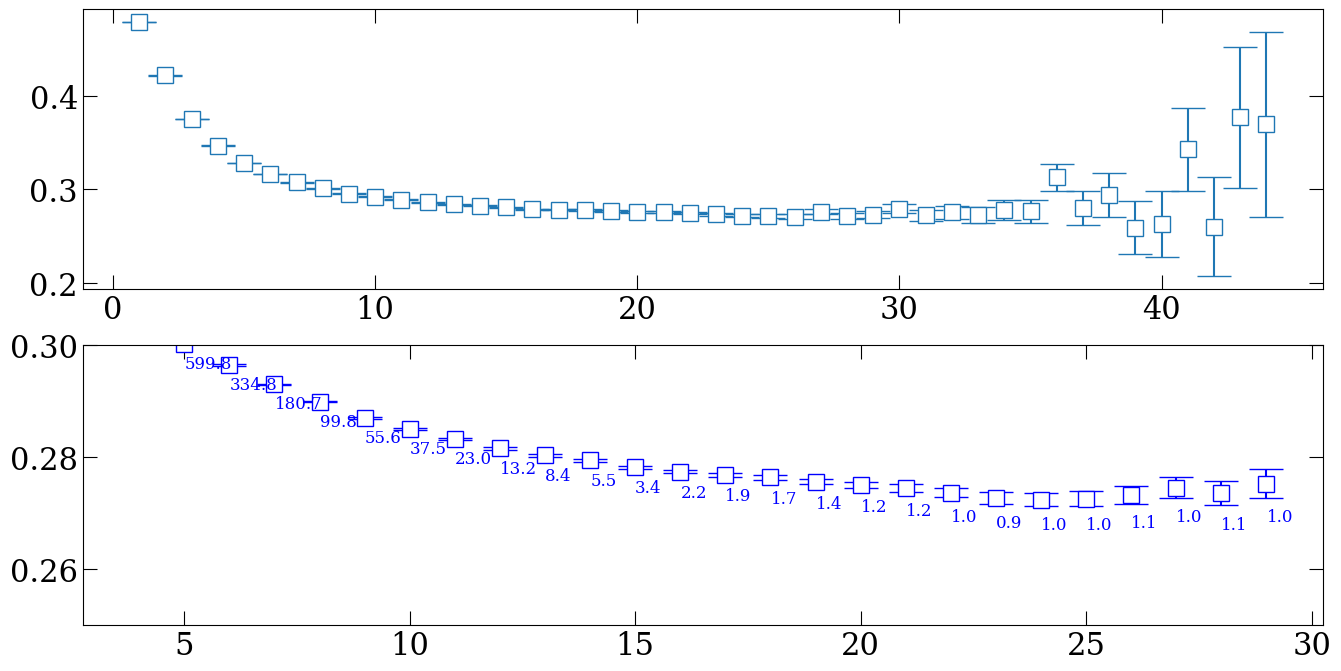

In [10]:
# plateau fit
(Nrow,Ncol)=(2,1); (Lrow,Lcol)=(4,8*2)
fig, axs = plt.subplots(Nrow, Ncol, figsize=(Lcol*Ncol, Lrow*Nrow), squeeze=False)

dat_jk=jackknife(dat)
func=lambda C2pt: np.log(C2pt/np.roll(C2pt,-1,axis=0))
mEff_jk=np.array([func(C2pt) for C2pt in dat_jk])
(mEff_mean,mEff_err)=jackME(mEff_jk)

irow=0; icol=0
tmin=1; tmax=44+1
tList_plt=np.arange(tmin,tmax); mean_plt=mEff_mean[tmin:tmax]; err_plt=mEff_err[tmin:tmax]
axs[irow,icol].errorbar(tList_plt,mean_plt,err_plt,fmt='s',mfc='white')

mEff_rela=np.abs(mEff_err/mEff_mean)
temp=[(i,rela) for i,rela in enumerate(mEff_rela) if rela>0.2]
print(temp)
fitmax=temp[0][0]
fitmins=np.arange(4,30)

mEff_cov=jackcov(mEff_jk)
fitfunc=lambda t,mN:mN

irow=1
for fitmin in fitmins:
    tList=np.arange(fitmin,fitmax)
    def plateau_fit(mEff):
        res=curve_fit(fitfunc,tList,mEff[fitmin:fitmax],sigma=mEff_cov[fitmin:fitmax,fitmin:fitmax],absolute_sigma=True,p0=[1])
        return res[0]
    mN_jk=np.array([plateau_fit(mEff) for mEff in mEff_jk])
    (mN_mean,mN_err)=jackME(mN_jk)
    tList_plt=[fitmin]; mean_plt=mN_mean; err_plt=mN_err
    axs[irow,icol].errorbar(tList_plt,mean_plt,err_plt,fmt='s',color='b',mfc='white')
    axs[irow,icol].set_ylim([0.25,0.3])

    ylim=axs[irow,icol].get_ylim()
    chi2_shift=(ylim[1]-ylim[0])/12
    y_fit=fitfunc(tList,mN_mean); y_lat=mEff[fitmin:fitmax]; y_cov=mEff_cov[fitmin:fitmax,fitmin:fitmax]
    chi2=(y_fit-y_lat)@np.linalg.inv(y_cov)@(y_fit-y_lat)
    chi2R=chi2/(len(tList)-1)
    tmean=mean_plt[0]; terr=err_plt[0]
    axs[irow,icol].annotate("%0.1f" %chi2R,(fitmin,tmean-terr-chi2_shift),color='b',size=12)
    

In [11]:
# physical units
# t -> t/a; mN -> a*mN
# a=0.05692 (fm) aInv=3.4662684469430785 (GeV)

# one-, two-, and three-state fits (p0 could be important)
fitfunc_1st=lambda t,mN,c0:c0*np.exp(-mN*t)
fitfunc_2st=lambda t,mN,c0,dE,rc1:c0*np.exp(-mN*t)*(1+rc1*np.exp(-dE*t))

# How to get a speed-up?